<a href="https://colab.research.google.com/github/datascientist-ld1981/sentiment-analysis-ML-/blob/main/Amaran_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective
To perform sentiment analysis on a small, skewed text dataset using Naive Bayes, Random Forest, and Logistic Regression models. The goal is to:

Classify text into positive and neutral sentiments.
Evaluate model performance using accuracy, precision, recall, and F1-score.
Address challenges of class imbalance and small dataset size.

The project identifies the best-performing model and suggests improvements for future work.

In [ ]:
#Install scrping tool
pip install requests beautifulsoup4


In [ ]:
#Data collection : Scraping reviews from IMDB website for Amaran movie and writing to a CSV file
import requests
import csv
from bs4 import BeautifulSoup

# Define the URL of the IMDb movie's review page
url = 'https://www.imdb.com/title/tt27118357/reviews/'  # Amaran reviews URL

# Define headers with a User-Agent to mimic a real browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the IMDb page with the User-Agent
response = requests.get(url, headers=headers)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    print("Page fetched successfully.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()  # Exit if the page cannot be fetched

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the reviews (Adjust the tag and class based on inspection)
reviews = soup.find_all('div', {'class': 'ipc-html-content-inner-div'})  # Adjust this based on actual class name

# If reviews are found, process them
if reviews:
    review_texts = [review.get_text().strip() for review in reviews]
else:
    print("No reviews found. Please inspect the page for correct tags.")
    review_texts = []

# Path to the CSV file
csv_file_path = 'amaran_reviews_imdb_scraped.csv'

# Writing the reviews to the CSV file
with open(csv_file_path, mode='a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # If the file is empty, write the header first
    if file.tell() == 0:
        writer.writerow(['reviews'])

    # Write each review in a new row
    for review in review_texts:
        writer.writerow([review])

print(f"Successfully saved {len(review_texts)} reviews to {csv_file_path}")


Page fetched successfully.
Successfully saved 23 reviews to amaran_reviews_imdb_scraped.csv


# **Preprocess Text for Sentiment Analysis**

**Load the Data**

In [ ]:
import pandas as pd
df = pd.read_csv('amaran_reviews_imdb_scraped.csv')
print(df.head())


                                             reviews
0  Nothing else, but hats off to the Major, a leg...
1  "Amaran" is a beautifully crafted film that tu...
2  An inspiring true story with you - the bravery...
3  Amaran is a really well-made emotional-action ...
4  "Hey Film Squads! This movie is perfect for Di...


**Clean the Data** - Importing/Downloading/Intialising

In [ ]:
# Import necessary libraries
import re
from nltk.corpus import stopwords  # Import stopwords here
from nltk.stem import WordNetLemmatizer
import nltk

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))  # Now stopwords is properly imported
lemmatizer = WordNetLemmatizer()

print("Stopwords and WordNet Lemmatizer initialized successfully.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Stopwords and WordNet Lemmatizer initialized successfully.


In [ ]:
# Function to clean text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize words
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize
    return ' '.join(text)

# Apply cleaning to reviews
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)
print(df.head())

df.to_csv('cleaned_amaran_reviews.csv', index=False)
print("Cleaned data saved to 'cleaned_amaran_reviews.csv'")


                                             reviews  \
0  Nothing else, but hats off to the Major, a leg...   
1  "Amaran" is a beautifully crafted film that tu...   
2  An inspiring true story with you - the bravery...   
3  Amaran is a really well-made emotional-action ...   
4  "Hey Film Squads! This movie is perfect for Di...   

                                     cleaned_reviews  
0  nothing else hat major legend mukund varadaraj...  
1  amaran beautifully crafted film tug heartstrin...  
2  inspiring true story bravery major mukund vara...  
3  amaran really wellmade emotionalaction drama w...  
4  hey film squad movie perfect diwali family aud...  
Cleaned data saved to 'cleaned_amaran_reviews.csv'


# **Exploratory Data Analysis**

count      23.000000
mean     1022.260870
std       597.047677
min       612.000000
25%       659.000000
50%       741.000000
75%      1016.000000
max      2745.000000
Name: review_length, dtype: float64


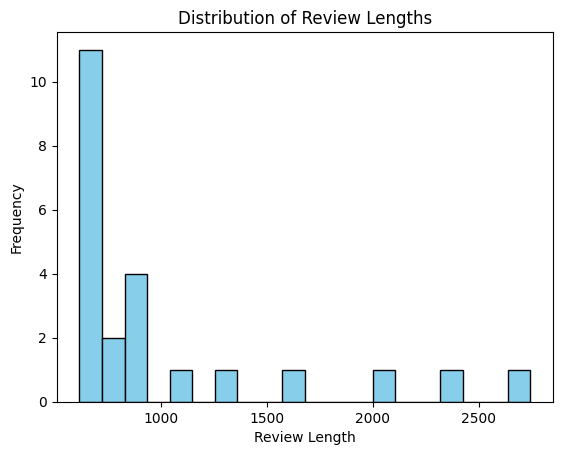

In [ ]:
# Create a new column 'review_length' to store the length of each review
df['review_length'] = df['reviews'].apply(len)

# Display the summary statistics for review lengths
print(df['review_length'].describe())

# Plot the distribution of review lengths
import matplotlib.pyplot as plt

plt.hist(df['review_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


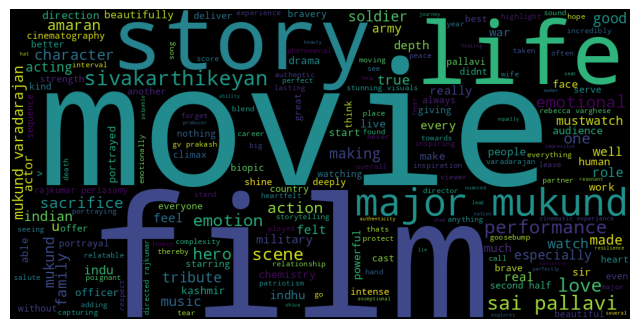

In [ ]:
#Word Cloud Analysis
from wordcloud import WordCloud

all_reviews=''.join(df['cleaned_reviews'])

wordcloud=WordCloud(width=1000,height=500).generate(all_reviews)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Get the top 10 bigrams
bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_bigrams = bigrams.sum().sort_values(ascending=False).head(10)
print(top_bigrams)


sai pallavi                 23
major mukund                23
mukund varadarajan          10
sivakarthikeyan sai          6
mukund sir                   5
rajkumar periasamy           4
second half                  4
starring sivakarthikeyan     3
gv prakash                   3
tribute real                 3
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
df=pd.read_csv('cleaned_amaran_reviews.csv')
reviews=df['cleaned_reviews']

# Initialize the TfidfVectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the reviews
X_tfidf = tfidf_vectorizer.fit_transform(reviews)

# Convert the result to a DataFrame for easy viewing
tfidf_bigrams = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTfidfVectorizer (Bigrams):")
print(tfidf_bigrams)



TfidfVectorizer (Bigrams):
    ability evoke  ability hope  able emotion  able enjoy  able hear  \
0        0.000000      0.000000      0.000000     0.00000   0.000000   
1        0.095771      0.095771      0.000000     0.00000   0.000000   
2        0.000000      0.000000      0.000000     0.00000   0.000000   
3        0.000000      0.000000      0.000000     0.00000   0.000000   
4        0.000000      0.000000      0.000000     0.00000   0.000000   
5        0.000000      0.000000      0.000000     0.00000   0.000000   
6        0.000000      0.000000      0.000000     0.12047   0.000000   
7        0.000000      0.000000      0.000000     0.00000   0.000000   
8        0.000000      0.000000      0.000000     0.00000   0.000000   
9        0.000000      0.000000      0.000000     0.00000   0.000000   
10       0.000000      0.000000      0.000000     0.00000   0.000000   
11       0.000000      0.000000      0.000000     0.00000   0.000000   
12       0.000000      0.000000     

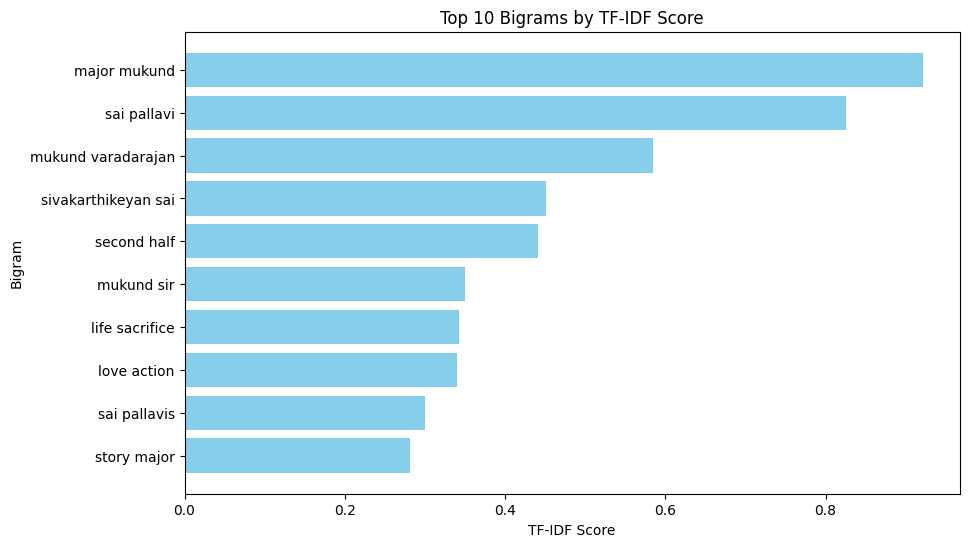

In [ ]:
import matplotlib.pyplot as plt

# Sum the TF-IDF scores for each bigram
bigram_scores = tfidf_bigrams.sum(axis=0)

# Convert to a DataFrame for easy visualization
bigram_df = pd.DataFrame({'bigram': tfidf_vectorizer.get_feature_names_out(), 'score': bigram_scores})
bigram_df = bigram_df.sort_values(by='score', ascending=False).head(10)

# Plot the top bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_df['bigram'], bigram_df['score'], color='skyblue')
plt.xlabel("TF-IDF Score")
plt.ylabel("Bigram")
plt.title("Top 10 Bigrams by TF-IDF Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from textblob import TextBlob
import pandas as pd

# Load the cleaned reviews
df = pd.read_csv('cleaned_amaran_reviews.csv')
# Function to analyze sentiment with custom thresholds
def analyze_sentiment(text, pos_threshold=0.2, neg_threshold=-0.2):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > pos_threshold:
        return 'positive'
    elif polarity < neg_threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis with custom thresholds
df['sentiment'] = df['reviews'].apply(analyze_sentiment, pos_threshold=0.2, neg_threshold=-0.2)

# Check the distribution of sentiments
print(df['sentiment'].value_counts())

# Save labeled reviews
df.to_csv('labeled_reviews.csv', index=False)


sentiment
positive    14
neutral      9
Name: count, dtype: int64


In [ ]:
#labeling the dataset using Valder

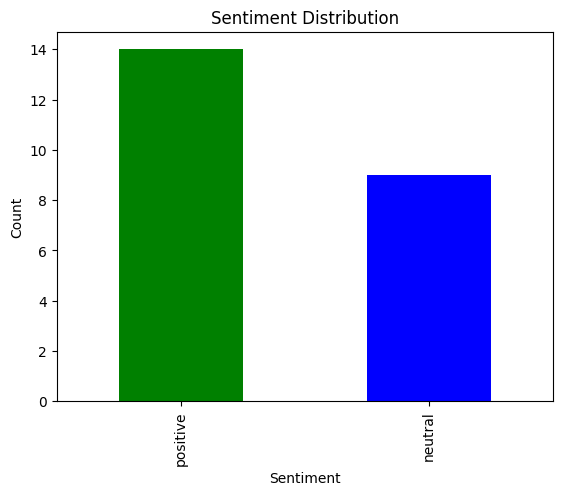

In [ ]:
#1. Check Sentiment Distribution
#Understand the balance between positive, neutral, and negative sentiments.
import pandas as pd
import matplotlib.pyplot as plt

# Load the labeled dataset
df = pd.read_csv('labeled_reviews.csv')

# Plot sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


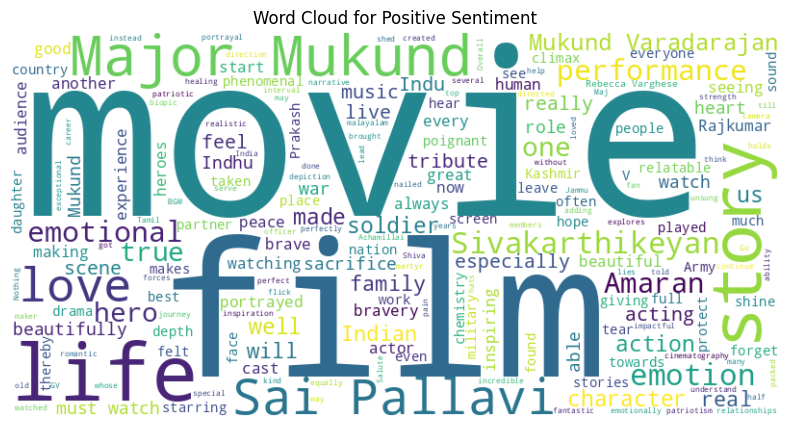

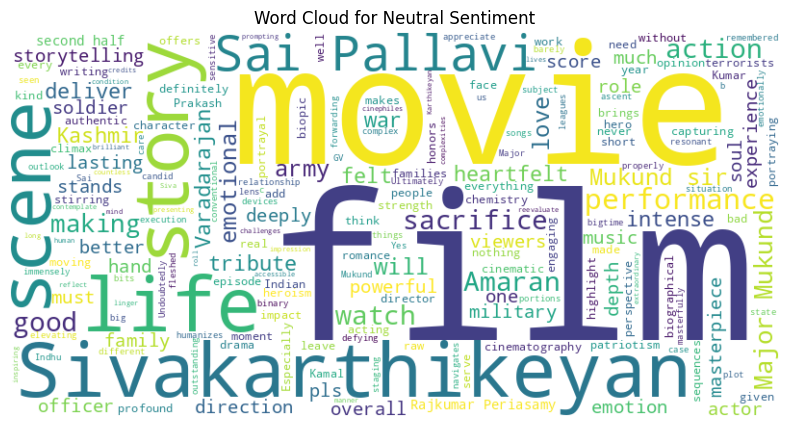

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['positive', 'neutral']:
    sentiment_reviews = ' '.join(df[df['sentiment'] == sentiment]['reviews'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_reviews)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()


In [ ]:
import pandas as pd


from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('labeled_reviews.csv')
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transform reviews into TF-IDF features
X = tfidf.fit_transform(df['reviews']).toarray()

# Convert sentiment labels into binary values (0 for neutral, 1 for positive)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Feature matrix shape: (23, 2816)
Labels shape: (23,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 18
Test set size: 5


In [ ]:
#training the model using naive bayes

from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model on the training set
model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)


In [ ]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['neutral', 'positive']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 80.00%
Classification Report:
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         1
    positive       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Confusion Matrix:
[[0 1]
 [0 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 1: Generate TF-IDF matrix for bigrams
import pandas as pd
df=pd.read_csv('labeled_reviews.csv')
df.head()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
print("Bigram Vectorizer", tfidf_vectorizer)
X_tfidf = tfidf_vectorizer.fit_transform(df['reviews'])
print("Xtfidf",X_tfidf)
tfidf_bigrams = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Step 2: Prepare the labels
labels = df['sentiment']  # Replace 'sentiment' with your column name for labels

# Step 3: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_bigrams, labels, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Bigram Vectorizer TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
Xtfidf   (0, 676)	0.1454418065204872
  (0, 962)	0.1454418065204872
  (0, 872)	0.1454418065204872
  (0, 1101)	0.07827227201338148
  (0, 1764)	0.1454418065204872
  (0, 957)	0.1454418065204872
  (0, 1275)	0.12851981011410898
  (0, 939)	0.1454418065204872
  (0, 187)	0.1454418065204872
  (0, 1420)	0.1454418065204872
  (0, 1216)	0.1454418065204872
  (0, 1120)	0.1454418065204872
  (0, 311)	0.1454418065204872
  (0, 696)	0.1454418065204872
  (0, 1495)	0.1454418065204872
  (0, 1667)	0.1454418065204872
  (0, 1574)	0.1454418065204872
  (0, 735)	0.1454418065204872
  (0, 447)	0.1454418065204872
  (0, 791)	0.1454418065204872
  (0, 994)	0.1454418065204872
  (0, 584)	0.1454418065204872
  (0, 604)	0.1454418065204872
  (0, 1523)	0.1454418065204872
  (0, 1463)	0.1454418065204872
  :	:
  (22, 1459)	0.12259561160204846
  (22, 1828)	0.12259561160204846
  (22, 36)	0.12259561160204846
  (22, 1289)	0.12259561160204846
  (22, 440)	0.1225

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")  # Use class_weight to handle imbalance

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))



Random Forest - Confusion Matrix:
[[0 1]
 [0 4]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         1
    positive       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



# Inferences and Conclusion
Inferences and Conclusion (Brief):
Impact of Class Imbalance:

The dataset's skew towards the positive sentiment limits the models' ability to identify the minority (neutral) class.
This is reflected in lower precision and recall for the neutral class.
Model Performance:

Random Forest achieved the best results with 80% accuracy and balanced metrics.
Logistic Regression performed well but struggled with class imbalance.
Naive Bayes showed decent results despite its simplicity.
Metric Insights:

Accuracy alone is misleading due to class imbalance. Metrics like precision, recall, and F1-score give a clearer view.

Data Limitation:

The small, imbalanced dataset limits model learning. Improving data balance and size will enhance performance.

# Conclusion:
Random Forest outperformed the other models.
Addressing class imbalance through techniques like data augmentation or resampling can improve results.
Future work can explore advanced models like LSTM or pretrained embeddings for better predictions.